In [53]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
#from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('cities.csv')

In [3]:
columns_titles = ["City", "Location", "Rank", "Index", "Stability","Healthcare", "Education", "Culture_Environment","Infrastructure"]
df=df.reindex(columns=columns_titles)

In [4]:
flag_paths = list(Path("country_flags").glob("*.png"))
country_to_flagpath = {p.stem: p for p in flag_paths}

In [5]:
country_to_flagpath 

{'Algeria': WindowsPath('country_flags/Algeria.png'),
 'Australia': WindowsPath('country_flags/Australia.png'),
 'Austria': WindowsPath('country_flags/Austria.png'),
 'Bangladesh': WindowsPath('country_flags/Bangladesh.png'),
 'Cameroon': WindowsPath('country_flags/Cameroon.png'),
 'Canada': WindowsPath('country_flags/Canada.png'),
 'Denmark': WindowsPath('country_flags/Denmark.png'),
 'Japan': WindowsPath('country_flags/Japan.png'),
 'Libya': WindowsPath('country_flags/Libya.png'),
 'New Zealand': WindowsPath('country_flags/New Zealand.png'),
 'Nigeria': WindowsPath('country_flags/Nigeria.png'),
 'Pakistan': WindowsPath('country_flags/Pakistan.png'),
 'Papua New Guinea': WindowsPath('country_flags/Papua New Guinea.png'),
 'Switzerland': WindowsPath('country_flags/Switzerland.png'),
 'Syria': WindowsPath('country_flags/Syria.png'),
 'Ukraine': WindowsPath('country_flags/Ukraine.png'),
 'Zimbabwe': WindowsPath('country_flags/Zimbabwe.png')}

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 21 non-null     object 
 1   Location             21 non-null     object 
 2   Rank                 21 non-null     float64
 3   Index                21 non-null     float64
 4   Stability            21 non-null     float64
 5   Healthcare           21 non-null     float64
 6   Education            21 non-null     float64
 7   Culture_Environment  21 non-null     float64
 8   Infrastructure       21 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.6+ KB


In [7]:
df["Rank"] = df["Rank"].round().astype(int)

In [8]:
df.insert(0, "Flag", df["Location"].apply(lambda x: country_to_flagpath.get(x)))
df = df.set_index("City")

In [9]:
df.rename(columns={'Culture_Environment': 'Environment'}, inplace=True)

In [10]:
df

,Flag,Location,Rank,Index,Stability,Healthcare,Education,Environment,Infrastructure
City,,,,,,,,,
Vienna,country_flags\Austria.png,Austria,1,98.4,100.0,100.0,100.0,93.5,100.0
Copenhagen,country_flags\Denmark.png,Denmark,2,98.0,100.0,95.8,100.0,95.4,100.0
Melbourne,country_flags\Australia.png,Australia,3,97.7,95.0,100.0,100.0,95.8,100.0
Sydney,country_flags\Australia.png,Australia,4,97.4,95.0,100.0,100.0,94.4,100.0
Vancouver,country_flags\Canada.png,Canada,5,97.3,95.0,100.0,100.0,97.2,96.4
Zurich,country_flags\Switzerland.png,Switzerland,6,97.1,95.0,100.0,100.0,96.3,96.4
Calgary,country_flags\Canada.png,Canada,7,96.8,100.0,100.0,100.0,87.3,100.0
Geneva,country_flags\Switzerland.png,Switzerland,7,96.8,95.0,100.0,100.0,94.9,96.4
Toronto,country_flags\Canada.png,Canada,9,96.5,100.0,100.0,100.0,94.4,89.3


In [11]:
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

In [12]:
basic_services_cols = ["Stability", "Healthcare", "Education"]
infrastructure_env_cols = ["Environment", "Infrastructure"]

col_defs = (
    [
        ColumnDefinition(
            name="Flag",
            title="",
            textprops={"ha": "center"},
            width=0.5,
            plot_fn=circled_image,
        ),
        ColumnDefinition(
            name="City",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
        ColumnDefinition(
            name="Location",
            textprops={"ha": "center"},
            width=0.75,
        ),
         ColumnDefinition(
            name="Rank",
            textprops={"ha": "center"},
            width=0.75,
        ),
         ColumnDefinition(
            name="Index",
            textprops={"ha": "center"},
            width=0.75,
        ),
        ColumnDefinition(
            name="Stability",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Stability"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
        ColumnDefinition(
            name="Healthcare",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Healthcare"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
         ColumnDefinition(
            name="Education",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Education"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Quality of Life",
        ),
          ColumnDefinition(
            name="Environment",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Environment"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Environment",
        ),
             ColumnDefinition(
            name="Infrastructure",
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df["Infrastructure"], cmap=matplotlib.cm.PiYG, num_stds=4),
            group="Environment",
        ),
    ])

In [13]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

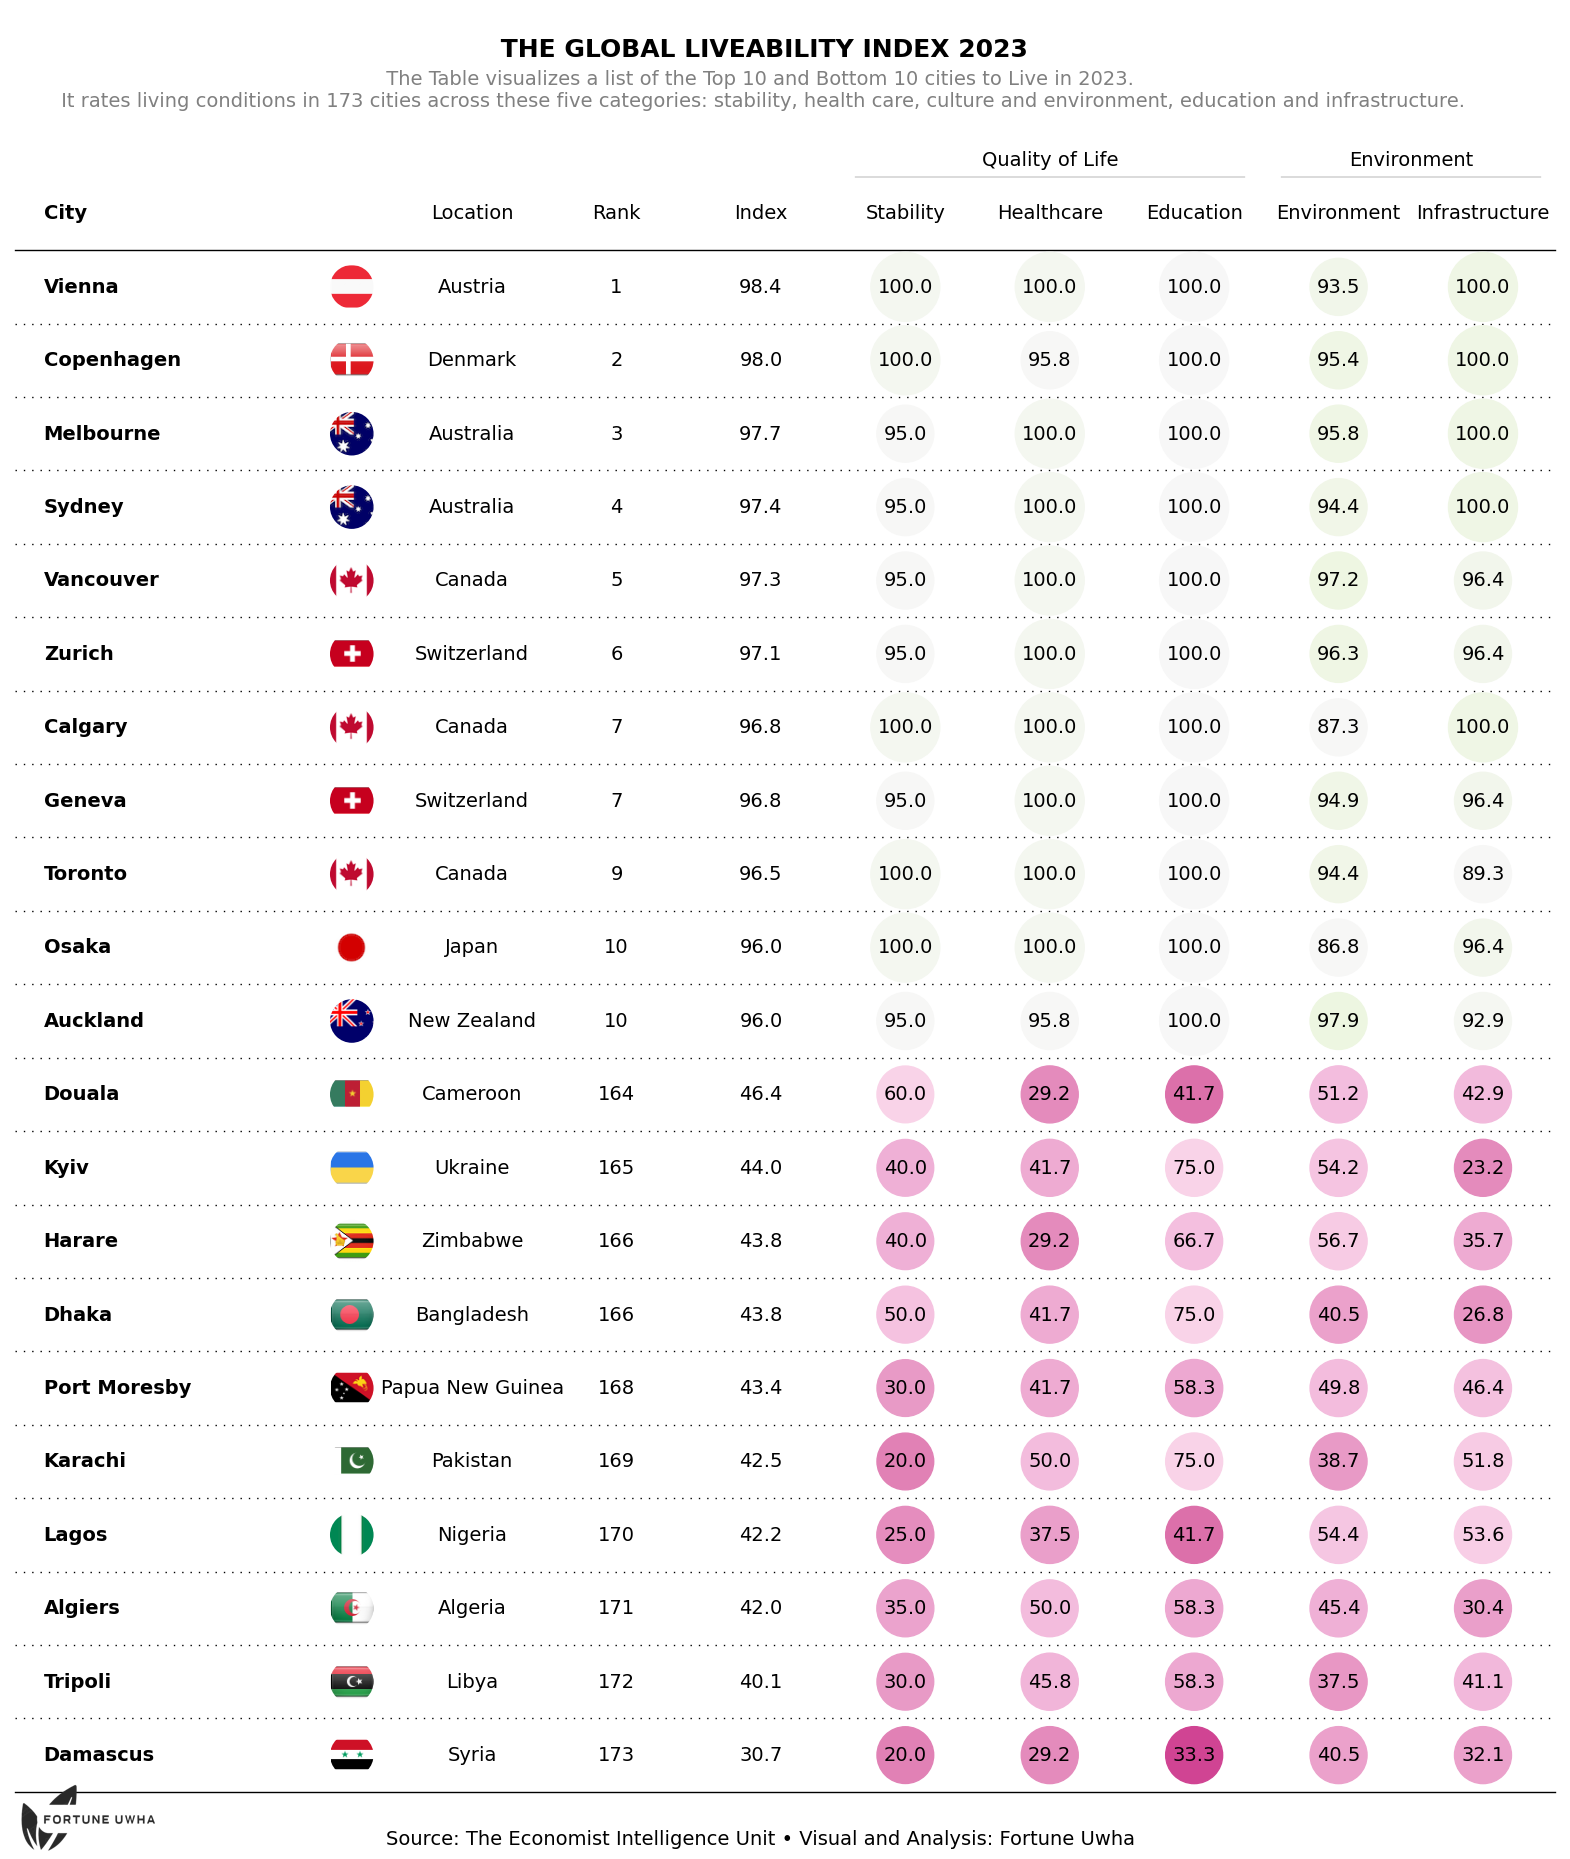

In [81]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)

# Adding the bold header as a text annotation
header_text = "\n THE GLOBAL LIVEABILITY INDEX 2023"
header_props = {'fontsize': 18, 'fontweight': 'bold', 'va': 'center', 'ha': 'center'}
# Adjusting the y-coordinate to bring the header closer to the table
plt.text(0.5, 0.91, header_text, transform=fig.transFigure, **header_props)

# Adding the subtitle at the top in gray
subtitle_text = "\n The Table visualizes a list of the Top 10 and Bottom 10 cities to Live in 2023. \n It rates living conditions in 173 cities across these five categories: stability, health care, culture and environment, education and infrastructure."
subtitle_props = {'fontsize': 14, 'va': 'center', 'ha': 'center', 'color': 'gray'}
plt.text(0.5, 0.89, subtitle_text, transform=fig.transFigure, **subtitle_props)

# Adding the footer text
footer_text = "Source: The Economist Intelligence Unit • Visual and Analysis: Fortune Uwha"
footer_props = {'fontsize': 14, 'va': 'center', 'ha': 'center'}
# Adjusting the y-coordinate to position the footer closer to the bottom of the figure
plt.text(0.5, 0.09, footer_text, transform=fig.transFigure, **footer_props)

# Load and resize the logo image using Pillow
logo_path = "logo.png"  # Replace with the path to your logo image
logo = Image.open(logo_path)
# Resize the logo to the desired dimensions
new_logo_size = (180, 100)  # Adjust to your preferred size
logo = logo.resize(new_logo_size)
# Convert the PIL Image to a NumPy array
logo = np.array(logo)
# Position the logo on the right side of the page
xo = 0.5  # Adjust to position the logo where you want
yo = 0.09

plt.figimage(logo, xo=xo, yo=yo, origin='upper')

fig.savefig("eiu_table.png", facecolor=ax.get_facecolor(), dpi=200)